# Lia Rainingsih

### Content :
* #### Exploratory Data Analysis
* #### Feature Engineering
* #### Model Iterations
* #### Important Metrics: AUC ROC, Recall, Precision, F1-score.

## Import Library

In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline, metrics
from sklearn.svm import SVC

from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score

## Data Loading

In [185]:
describe =pd.read_csv('column_description.csv')
describe

,No,Column,Description,Type
0,1,income,Income of the user,int
1,2,age,Age of the user,int
2,3,experience,Professional experience of the user in years,int
3,4,profession,Profession,string
4,5,married,Whether married or single,string
5,6,house_ownership,Owned or rented or neither,string
6,7,car_ownership,Does the person own a car,string
7,8,currentjobyears,Years of experience in the current job,int
8,9,currenthouseyears,Number of years in the current residence,int
9,10,city,City of residence,string


#### Deskripsi Data beserta type data

In [186]:
data=pd.read_csv('LoanDefaultData.csv')

In [187]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### Rename Kolom Married/Single

In [188]:
data.columns = data.columns.str.replace('Married/Single', 'Married_Single')

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married_Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [190]:
data.shape

(252000, 13)

#### Data terdiri dari 252000 baris dan 13 kolom  dengan type data int dan object

### Number Features tanpa kolom Risk_Flag dan Id

In [191]:
num_cols = list(data.select_dtypes("number").drop(columns = ["Risk_Flag", "Id"]).columns)
num_cols

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [192]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.0,10.0,15.0,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.0,12.0,13.0,14.0


### Category Features

In [193]:
cat_cols = list(data.select_dtypes(object).columns)
cat_cols

['Married_Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

In [194]:
data[cat_cols].describe().T

,count,unique,top,freq
Married_Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


## Data Cleaning
### Missing Values

In [195]:
data.isnull().any()

Id                   False
Income               False
Age                  False
Experience           False
Married_Single       False
House_Ownership      False
Car_Ownership        False
Profession           False
CITY                 False
STATE                False
CURRENT_JOB_YRS      False
CURRENT_HOUSE_YRS    False
Risk_Flag            False
dtype: bool

#### Data sudah tidak ada yang bernilai null

### Duplicate Rows

In [196]:
data.duplicated().any()

False

#### Tidak ada data duplikat

## Exploratory Data Analysis (EDA)

### Numerical Features
#### Univariate

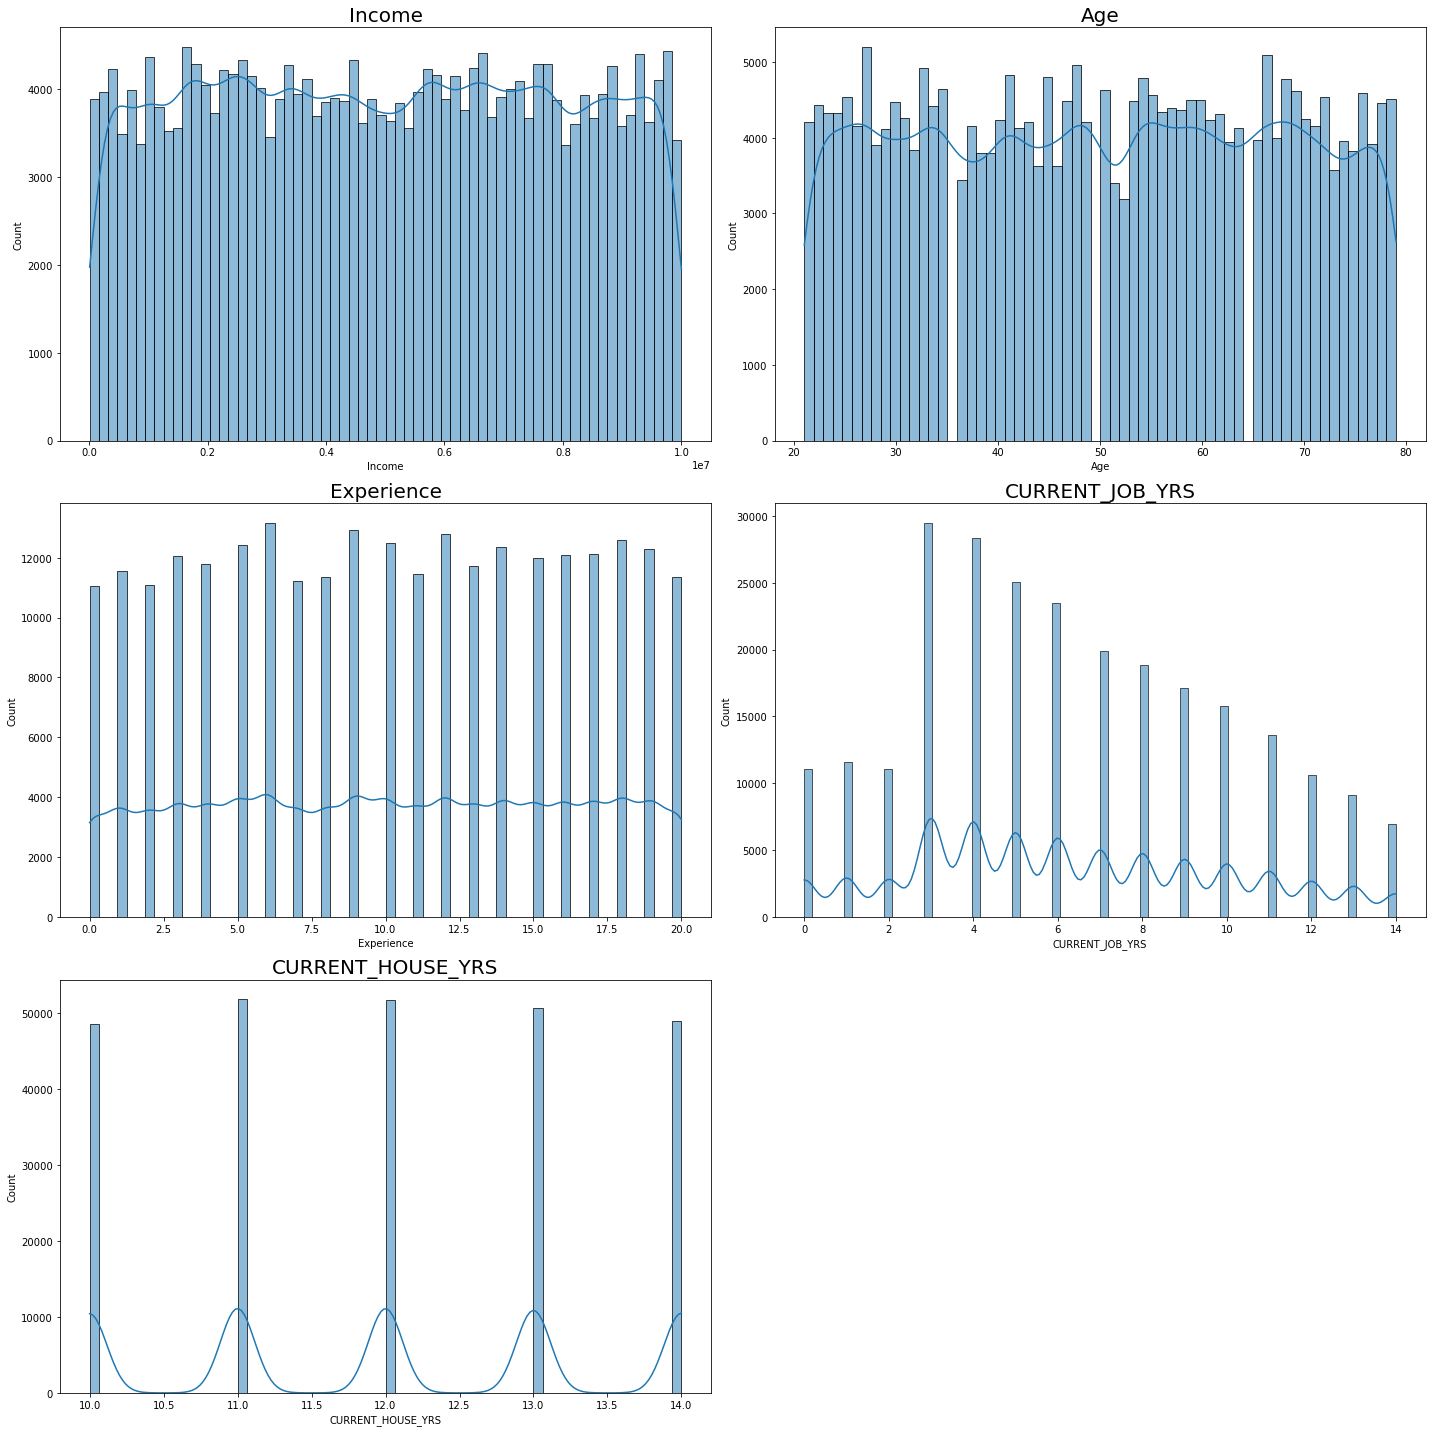

In [197]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2+1, 2, i + 1)
    sns.histplot(data[num_cols[i]], kde=True)
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

#### Sebaran data distribusi normal:
* #### Income pada range 1,000,000-10,000,000 tersebar secara distribusi normal
* #### Range Age yang mengajukan Loan adalah 21-79 dengan sebaran data distribusi normal
* #### Experience 0-20 tahun tesebar secara distribusi normal
* #### Current_Job_Yrs terdistribusi secara normal dengan jumlah total customer yg angka 3 sebagai angka tertinggi dan jumlah customer dengan angka 14 sebagai angka terendahnya

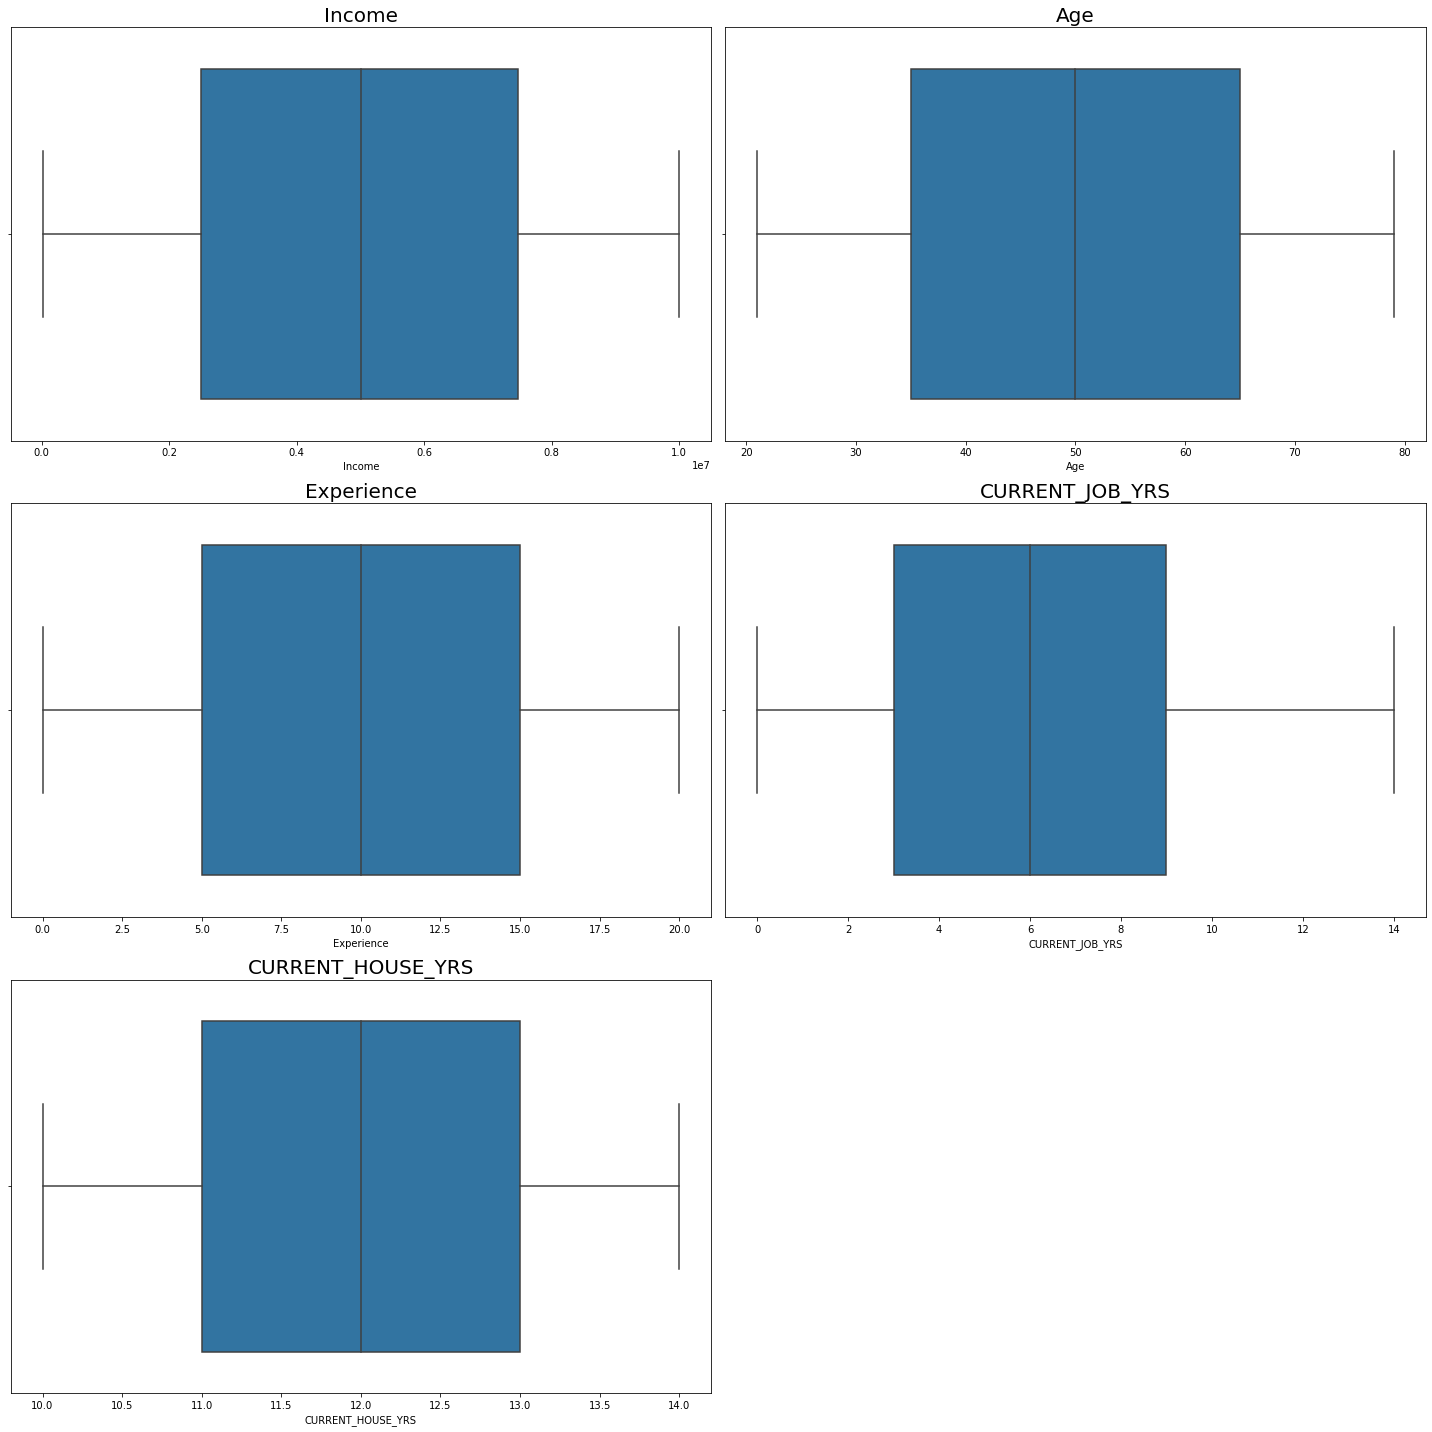

In [198]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2+1, 2, i + 1)
    sns.boxplot(x = data[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

#### Pada boxplot menunjukkan tidak terdapat outlier pada column features

#### Multivariate

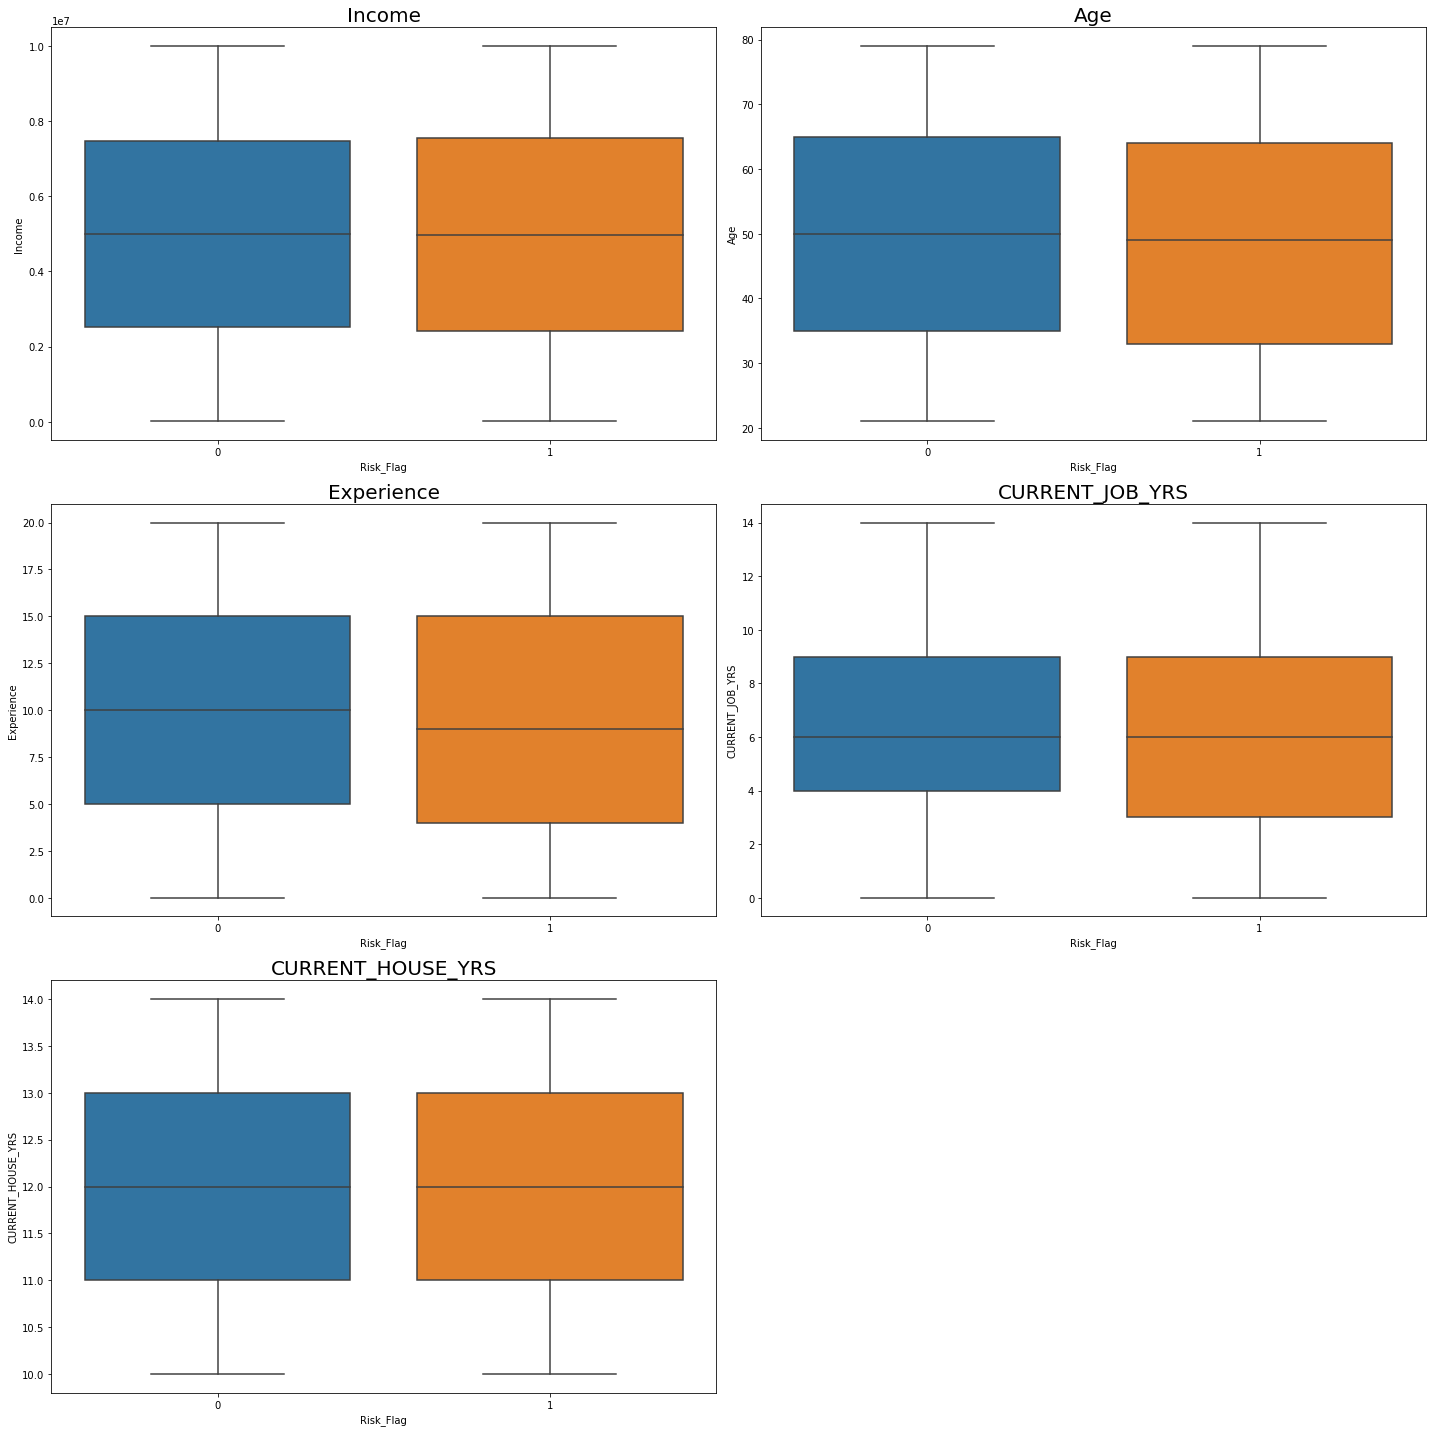

In [200]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2+1, 2, i + 1)
    sns.boxplot(y = data[num_cols[i]], x = data['Risk_Flag'])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

#### Sebaran data Numeric Features terhadap Risk-Flag hampir sama antara yang beresiko 0 dan 1

###  Categorical Features
#### Univariate

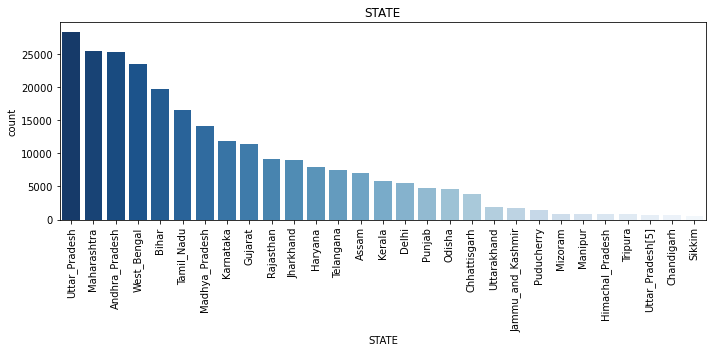

In [202]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["STATE"],
    # order by frequency
    order = data["STATE"].value_counts().sort_values(ascending = False).index,
    palette = "Blues_r"
)
plt.title("STATE", fontweight = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Data State dengan Uttar_Pradesh dengan customer terbanyak dan Skkim customer paling sedikit

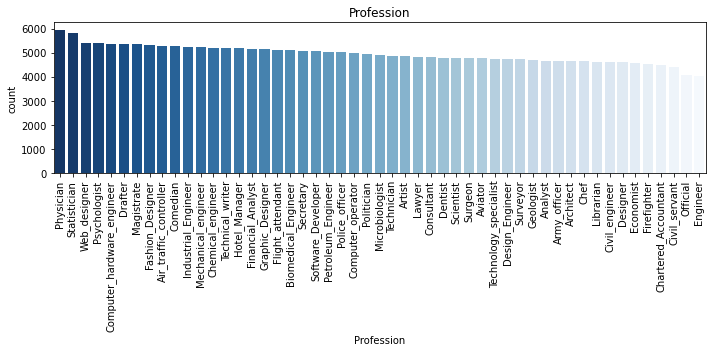

In [91]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["Profession"],
    # order by frequency
    order = data["Profession"].value_counts().sort_values(ascending = False).index,
    palette = "Blues_r"
)
plt.title("Profession", fontweight = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Data Profession dengan Physician terbanyak dan Engineer yang paling sedikit dengan jumlah yang hampir sama antar profession

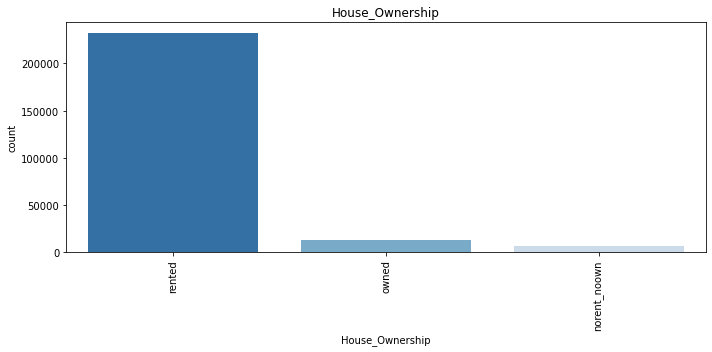

In [92]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["House_Ownership"],
    # order by frequency
    order = data["House_Ownership"].value_counts().sort_values(ascending = False).index,
    palette = "Blues_r"
)
plt.title("House_Ownership", fontweight = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Kepemilikan rumah(House_Ownership) terbanyak dengan rented >200000 customer, sedangkan owned dan norent_noown < 50000 customer

#### Multivariate

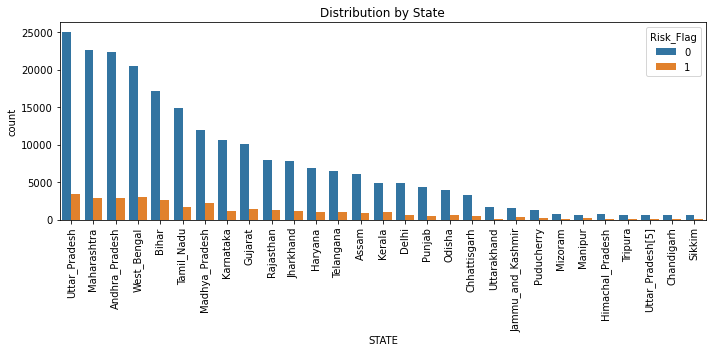

In [93]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["STATE"],
    hue = data["Risk_Flag"],
    # order by frequency
    order = data["STATE"].value_counts().sort_values(ascending = False).index
)
plt.title("Distribution by State", fontweight = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Customer berdasarkan State, perbandingan Risk_Flag 1 jauh lebih sedikit dibandingkan dengan customer dengan Risk_flag 0

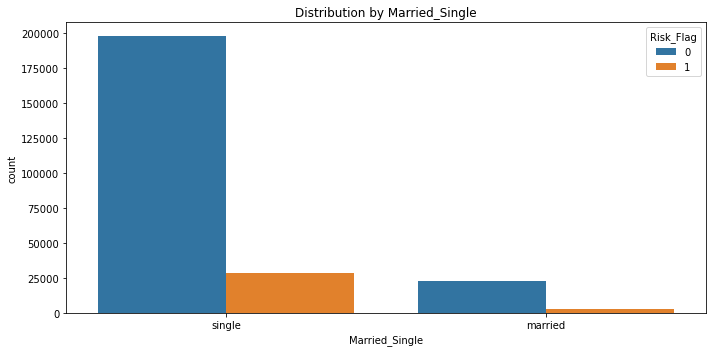

In [111]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["Married_Single"],
    hue = data["Risk_Flag"],
    # order by frequency
    order = data["Married_Single"].value_counts().sort_values(ascending = False).index
)
plt.title("Distribution by Married_Single", fontweight = 20)
plt.xlabel("Married_Single")
plt.tight_layout()
plt.show()

#### Perbandingan Risk_Flag dengan status 1 jauh lebih sedikit dibandingkan dengan status 0 pada sebaran data Married/Single

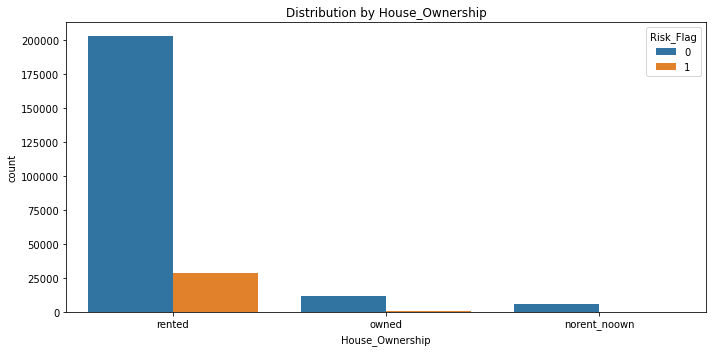

In [112]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["House_Ownership"],
    hue = data["Risk_Flag"],
    # order by frequency
    order = data["House_Ownership"].value_counts().sort_values(ascending = False).index
)
plt.title("Distribution by House_Ownership", fontweight = 20)
plt.xlabel("House_Ownership")
plt.tight_layout()
plt.show()

##### Sebaran data House_Ownership yang Risk_Flag berstatus 0 jauh lebih banyak dibandingkan dengan berstatus 1

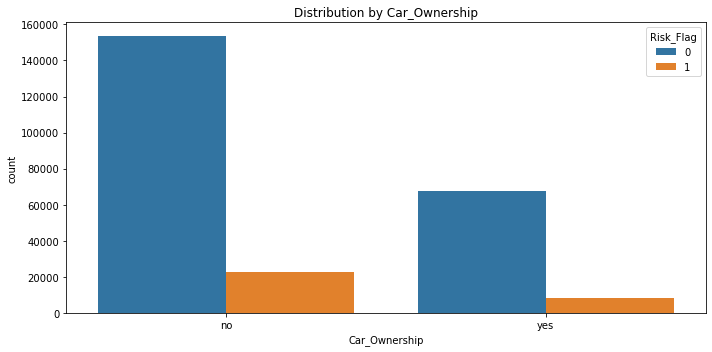

In [203]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = data["Car_Ownership"],
    hue = data["Risk_Flag"],
    # order by frequency
    order = data["Car_Ownership"].value_counts().sort_values(ascending = False).index
)
plt.title("Distribution by Car_Ownership", fontweight = 20)
plt.xlabel("Car_Ownership")
plt.tight_layout()
plt.show()

##### Sebaran data Car_Ownership yang Risk_Flag berstatus 0 jauh lebih banyak dibandingkan dengan berstatus 1

### Multicolinearity

In [204]:
vif_data = pd.DataFrame()
vif_data["feature"] = data[num_cols].columns
vif_data["VIF"] = [variance_inflation_factor(data[num_cols].values, i) for i in range(len(data[num_cols].columns))]
vif_data

,feature,VIF
0,Income,3.879021
1,Age,8.556036
2,Experience,6.541820
3,CURRENT_JOB_YRS,6.830915
4,CURRENT_HOUSE_YRS,13.281953


Kolom dengan jumlah VIF > 10 akan dihapus karena menunjukkan multicolinearity.

In [205]:
num_cols.remove('CURRENT_HOUSE_YRS')

### Correlation Matrix

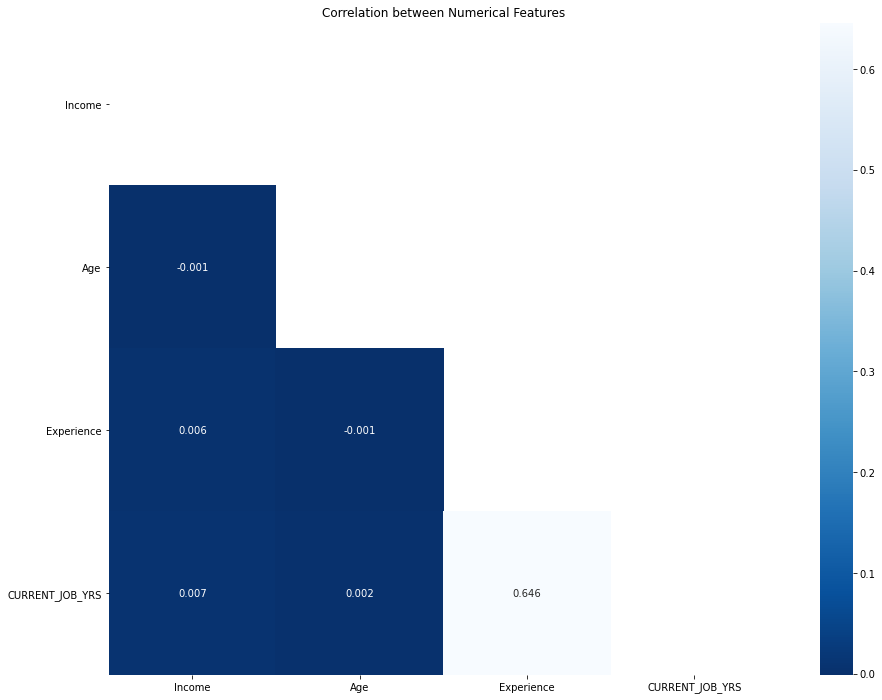

In [206]:
corr_ = data[num_cols].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_))

plt.figure(figsize = (15, 12))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Blues_r'
)
plt.title("Correlation between Numerical Features")
plt.yticks(rotation=0)
plt.show()

#### Korelasi tertinggi pada Experience dan CURRENT_JOB_YRS dengan angka 0.646

## Data Preprocessing
### Get Dummies Encoding

In [138]:
data_dummies = pd.get_dummies(data = data, columns = ['Married_Single','Car_Ownership','House_Ownership', 'Profession', 'CITY', 'STATE'])

In [139]:
data_dummies.shape

(252000, 411)

#### Setelah dilakukan get_dummies, terdapat 411 kolom

### Features Selection with Random Forest

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV

X=data_dummies.drop(['Risk_Flag', 'Id'], axis=1)
y=data_dummies['Risk_Flag']
X_trainRF,X_testRF,y_trainRF,y_testRF=train_test_split(X,y,test_size=0.3,random_state=9)

In [141]:
X_trainRF

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married_Single_married,Married_Single_single,Car_Ownership_no,Car_Ownership_yes,House_Ownership_norent_noown,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
94589,951589,66,12,3,12,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
39861,2573344,70,10,9,14,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
191632,5743908,29,19,7,14,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
179082,6457218,39,3,3,11,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
209594,7079992,41,7,6,10,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153656,2435155,77,5,5,13,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
196534,4691275,56,6,6,13,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
197109,4110405,22,4,4,10,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
187006,4329497,66,2,2,11,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
selected = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selected.fit(X_trainRF, y_trainRF)  

SelectFromModel(estimator=RandomForestClassifier())

In [144]:
selected_feat= X_trainRF.columns[(selected.get_support())]
len(selected_feat)
print('Feature Selected', (selected_feat.tolist()))

Feature Selected ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Married_Single_married', 'Married_Single_single', 'Car_Ownership_no', 'Car_Ownership_yes', 'House_Ownership_norent_noown', 'House_Ownership_owned', 'House_Ownership_rented', 'Profession_Air_traffic_controller', 'Profession_Analyst', 'Profession_Architect', 'Profession_Army_officer', 'Profession_Artist', 'Profession_Aviator', 'Profession_Biomedical_Engineer', 'Profession_Chartered_Accountant', 'Profession_Chef', 'Profession_Chemical_engineer', 'Profession_Civil_engineer', 'Profession_Civil_servant', 'Profession_Comedian', 'Profession_Computer_hardware_engineer', 'Profession_Computer_operator', 'Profession_Consultant', 'Profession_Dentist', 'Profession_Design_Engineer', 'Profession_Designer', 'Profession_Drafter', 'Profession_Economist', 'Profession_Engineer', 'Profession_Fashion_Designer', 'Profession_Financial_Analyst', 'Profession_Firefighter', 'Profession_Flight_attendant', 'Profession_Geologist

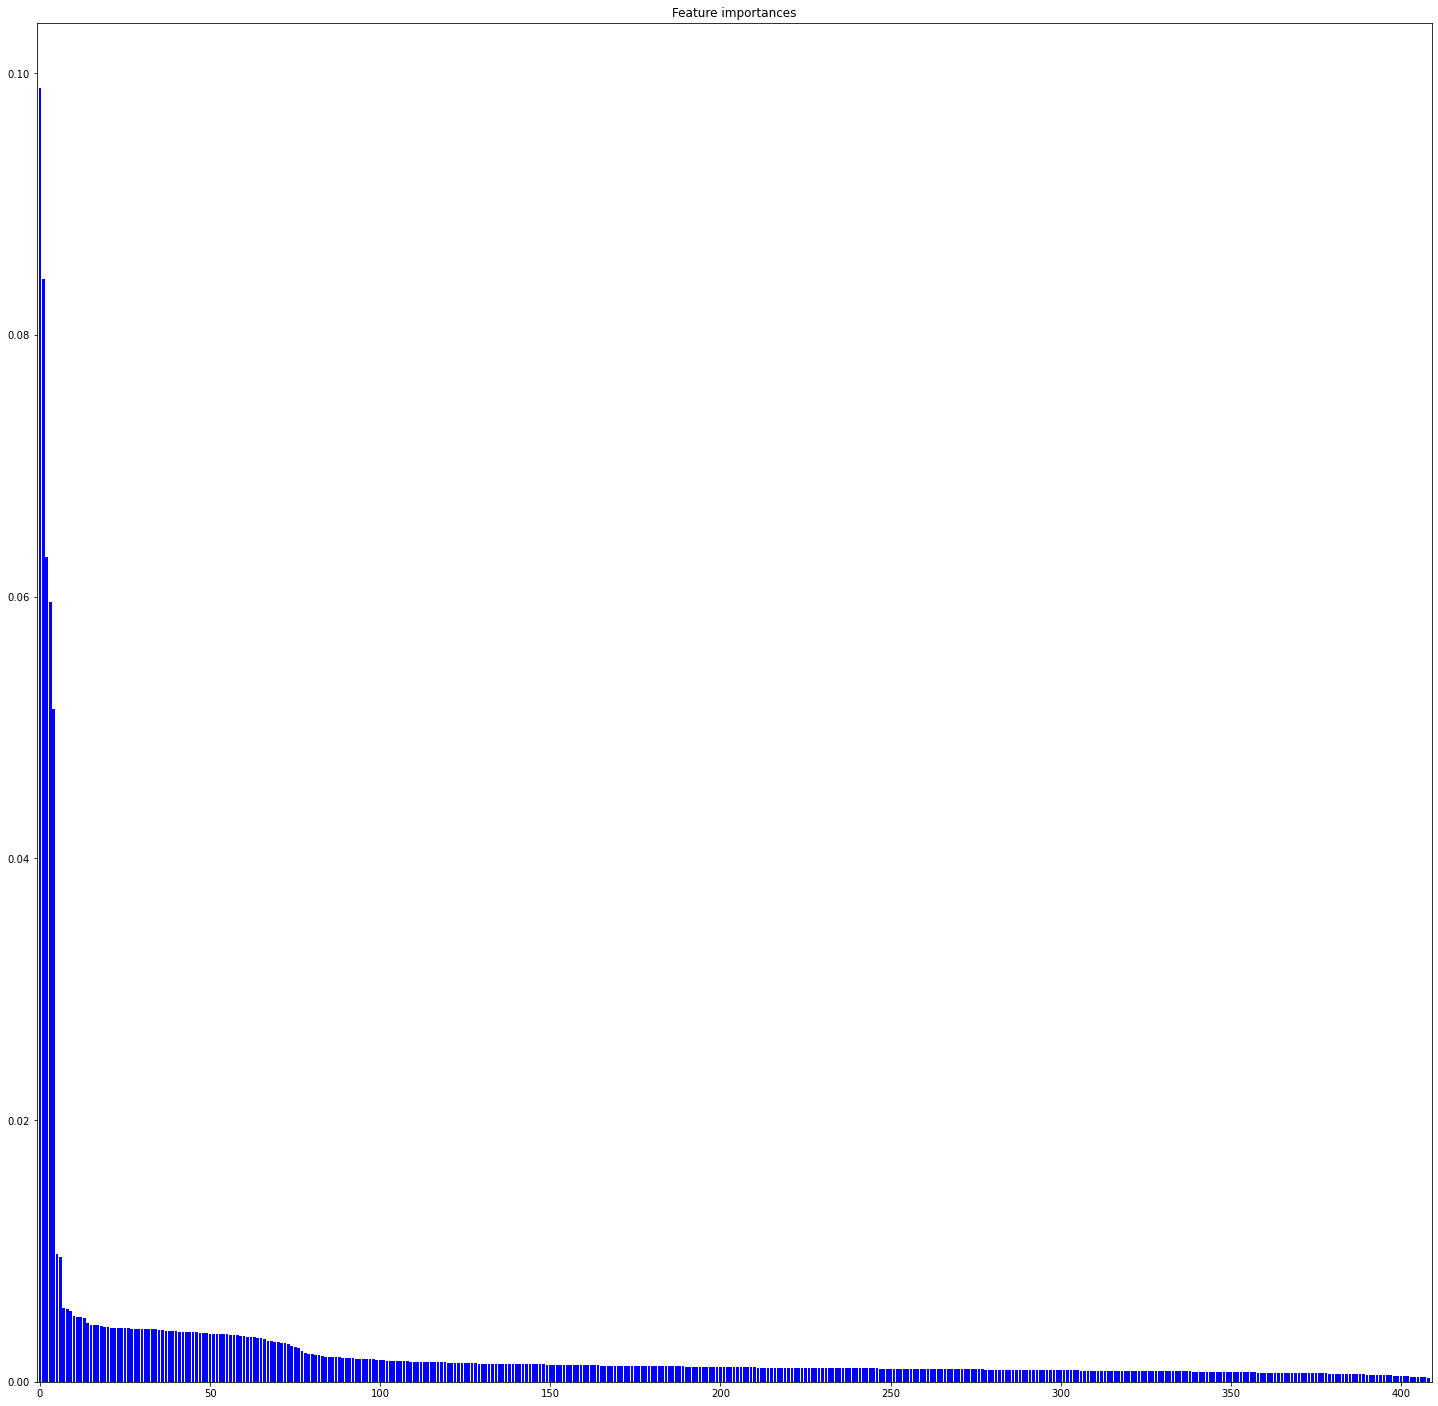

In [259]:
importances = selected.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize = (25, 25))
plt.title("Feature importances")
plt.bar(range(X_trainRF.shape[1]), importances[indices],
       color="b", align="center")
plt.xlim([-1, X_trainRF.shape[1]])
plt.show()

In [152]:
data_final = data_dummies[['Income', 'Age', 'Experience', 'Married_Single_married','Married_Single_single', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'House_Ownership_norent_noown', 'House_Ownership_owned', 'House_Ownership_rented', 'Profession_Air_traffic_controller', 'Profession_Analyst', 'Profession_Architect', 'Profession_Army_officer', 'Profession_Artist', 'Profession_Aviator', 'Profession_Biomedical_Engineer', 'Profession_Chartered_Accountant', 'Profession_Chef', 'Profession_Chemical_engineer', 'Profession_Civil_engineer', 'Profession_Civil_servant', 'Profession_Comedian', 'Profession_Computer_hardware_engineer', 'Profession_Computer_operator', 'Profession_Consultant', 'Profession_Dentist', 'Profession_Design_Engineer', 'Profession_Designer', 'Profession_Drafter', 'Profession_Economist', 'Profession_Engineer', 'Profession_Fashion_Designer', 'Profession_Financial_Analyst', 'Profession_Firefighter', 'Profession_Flight_attendant', 'Profession_Geologist', 'Profession_Graphic_Designer', 'Profession_Hotel_Manager', 'Profession_Industrial_Engineer', 'Profession_Lawyer', 'Profession_Librarian', 'Profession_Magistrate', 'Profession_Mechanical_engineer', 'Profession_Microbiologist', 'Profession_Official', 'Profession_Petroleum_Engineer', 'Profession_Physician', 'Profession_Police_officer', 'Profession_Politician', 'Profession_Psychologist', 'Profession_Scientist', 'Profession_Secretary', 'Profession_Software_Developer', 'Profession_Statistician', 'Profession_Surgeon', 'Profession_Surveyor', 'Profession_Technical_writer', 'Profession_Technician', 'Profession_Technology_specialist', 'Profession_Web_designer', 'STATE_Andhra_Pradesh', 'STATE_Assam', 'STATE_Bihar', 'STATE_Gujarat', 'STATE_Haryana', 'STATE_Jharkhand', 'STATE_Karnataka', 'STATE_Kerala', 'STATE_Madhya_Pradesh', 'STATE_Maharashtra', 'STATE_Rajasthan', 'STATE_Tamil_Nadu', 'STATE_Telangana', 'STATE_Uttar_Pradesh', 'STATE_West_Bengal', 'Risk_Flag']]

In [153]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 77 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   Income                                 252000 non-null  int64
 1   Age                                    252000 non-null  int64
 2   Experience                             252000 non-null  int64
 3   Married_Single_married                 252000 non-null  uint8
 4   Married_Single_single                  252000 non-null  uint8
 5   CURRENT_JOB_YRS                        252000 non-null  int64
 6   CURRENT_HOUSE_YRS                      252000 non-null  int64
 7   House_Ownership_norent_noown           252000 non-null  uint8
 8   House_Ownership_owned                  252000 non-null  uint8
 9   House_Ownership_rented                 252000 non-null  uint8
 10  Profession_Air_traffic_controller      252000 non-null  uint8
 11  Profession_An

#### Setelah dilakukan Feature Selection menggunakan Random Forest, Features yang digunakan sebanyak 77.

In [260]:
data_final

,Income,Age,Experience,Married_Single_married,Married_Single_single,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Rajasthan,STATE_Tamil_Nadu,STATE_Telangana,STATE_Uttar_Pradesh,STATE_West_Bengal,Risk_Flag
0,2767483,55,1,0,1,1,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4039406,64,15,1,0,5,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8426506,68,1,0,1,1,12,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1996629,58,3,0,1,3,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3791460,22,15,0,1,7,14,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61987,1244622,35,15,0,1,3,11,0,0,1,...,0,0,0,0,1,0,0,0,0,1
61988,1330613,63,19,0,1,13,12,0,0,1,...,0,0,0,0,0,0,0,0,0,1
61989,1796713,47,2,0,1,2,12,0,0,1,...,0,0,0,1,0,0,0,0,0,1
61990,3182290,52,2,0,1,2,10,0,0,1,...,0,0,0,0,0,0,0,0,1,1


### Check Imbalanced Target

<AxesSubplot:>

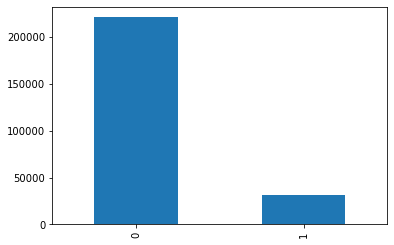

In [154]:
data_final.Risk_Flag.value_counts().plot(kind='bar')

#### Terdapat data Imbalance, selanjutnya akan dilakukan resampling data dengan metode Undersampling 

In [207]:
#Under-sampling
class0=data_final[data_final['Risk_Flag']==0]
class1=data_final[data_final['Risk_Flag']==1]
data_final=pd.concat([class0.sample(len(class1),random_state=42),class1],axis=0).reset_index(drop=True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61992 entries, 0 to 61991
Data columns (total 77 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Income                                 61992 non-null  int64
 1   Age                                    61992 non-null  int64
 2   Experience                             61992 non-null  int64
 3   Married_Single_married                 61992 non-null  uint8
 4   Married_Single_single                  61992 non-null  uint8
 5   CURRENT_JOB_YRS                        61992 non-null  int64
 6   CURRENT_HOUSE_YRS                      61992 non-null  int64
 7   House_Ownership_norent_noown           61992 non-null  uint8
 8   House_Ownership_owned                  61992 non-null  uint8
 9   House_Ownership_rented                 61992 non-null  uint8
 10  Profession_Air_traffic_controller      61992 non-null  uint8
 11  Profession_Analyst          

<AxesSubplot:>

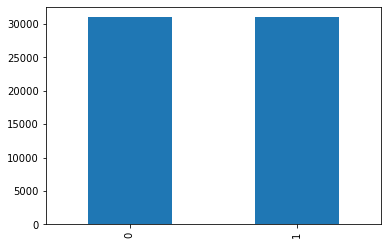

In [208]:
data_final.Risk_Flag.value_counts().plot(kind='bar')

#### Setelah dilakukan UnderSampling, Data menjadi Balance

## Features & Target

In [157]:
X=data_final.drop(['Risk_Flag'], axis=1)
y=data_final['Risk_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y ,random_state=42)

#### Features dengan menghapus kolom Risk_Flag dan Target adalah kolom Risk_Flag

In [158]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model Definition

In [243]:
LogReg = pipeline.make_pipeline(StandardScaler(), LogisticRegression(C=0.1, random_state=1))
RF = pipeline.make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=50, max_depth=4))
Ada = pipeline.make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=50, learning_rate=1))
SVM = pipeline.make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
XGb = pipeline.make_pipeline(StandardScaler(), XGBClassifier(max_depth=4, use_label_encoder =False, eval_metric = 'auc'))

## Training Model

In [250]:
LogReg.fit(X_train, y_train)
print(metrics.classification_report(y_test, LogR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      9299
           1       0.54      0.56      0.55      9299

    accuracy                           0.55     18598
   macro avg       0.55      0.55      0.55     18598
weighted avg       0.55      0.55      0.55     18598



In [245]:
RF.fit(X_train, y_train)
print(metrics.classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60      9299
           1       0.58      0.47      0.52      9299

    accuracy                           0.56     18598
   macro avg       0.57      0.56      0.56     18598
weighted avg       0.57      0.56      0.56     18598



In [248]:
Ada.fit(X_train, y_train)
print(metrics.classification_report(y_test, Ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56      9299
           1       0.56      0.55      0.55      9299

    accuracy                           0.56     18598
   macro avg       0.56      0.56      0.56     18598
weighted avg       0.56      0.56      0.56     18598



In [247]:
SVM.fit(X_train, y_train)
print(metrics.classification_report(y_test, SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      9299
           1       0.70      0.73      0.71      9299

    accuracy                           0.71     18598
   macro avg       0.71      0.71      0.71     18598
weighted avg       0.71      0.71      0.71     18598



In [249]:
XGb.fit(X_train, y_train)
print(metrics.classification_report(y_test, XGb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      9299
           1       0.72      0.72      0.72      9299

    accuracy                           0.72     18598
   macro avg       0.72      0.72      0.72     18598
weighted avg       0.72      0.72      0.72     18598



#### Diantara Model LogReg, RF, Ada, SVM, dan XGb , Model XGb dengan  nilai Accuracy, precision, recall, dan f1-score yang terbaik.

## Model Evaluation

In [252]:
params=[
    {'solver':['newton-cg','lbfgs'], "class_weight":['balanced', 'balanced_subsample']},
    {'n_estimators':[50,100],'max_depth':[4,5,6], 'criterion' :['gini', 'entropy'], 'max_features' :['auto', 'sqrt', 'log2'], "class_weight":['balanced', 'balanced_subsample']},
    {'n_estimators':[10, 50, 100, 500],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]},
    {'C':[0.1,1.5],'kernel':['rbf','sigmoid','linear']},
    {'max_depth':[6, 8, 10], 'min_child_weight' :[1, 2, 3], 'gamma' :[0 ,1 , 2], 'subsample':[0, 1], 'tree_method':['auto', 'gpu_hist']}]

In [254]:
grid=[
    GridSearchCV(LogisticRegression(),params[0],scoring='accuracy',cv=3,n_jobs=10),
    GridSearchCV(RandomForestClassifier(),params[1],scoring='accuracy',cv=3,n_jobs=10),
    GridSearchCV(AdaBoostClassifier(),params[2],scoring='accuracy',cv=3,n_jobs=10),
    GridSearchCV(SVC(),params[3],scoring='accuracy',cv=3,n_jobs=10),
    GridSearchCV(XGBClassifier(use_label_encoder =False, eval_metric = 'auc'),params[4],scoring='accuracy',cv=3,n_jobs=10)]

for g in grid:
    g.fit(X_train,y_train)

In [256]:
models=[
    LogisticRegression(solver=grid[0].best_params_['solver'],class_weight=grid[0].best_params_['class_weight'],fit_intercept=True),
    RandomForestClassifier(n_estimators=grid[1].best_params_['n_estimators'],max_depth=grid[1].best_params_['max_depth'], criterion=grid[1].best_params_['criterion'],max_features=grid[1].best_params_['max_features'], class_weight=grid[1].best_params_['class_weight']),
    AdaBoostClassifier(n_estimators=grid[2].best_params_['n_estimators'],learning_rate=grid[2].best_params_['learning_rate']),    
    SVC(C=grid[3].best_params_['C'],kernel=grid[3].best_params_['kernel'],probability=True),
    XGBClassifier(max_depth=grid[4].best_params_['max_depth'], min_child_weight=grid[4].best_params_['min_child_weight'], gamma=grid[4].best_params_['gamma'], subsample=grid[4].best_params_['subsample'], tree_method=grid[4].best_params_['tree_method'])
]
   
for mod in models:
    mod.fit(X_train,y_train)
    

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


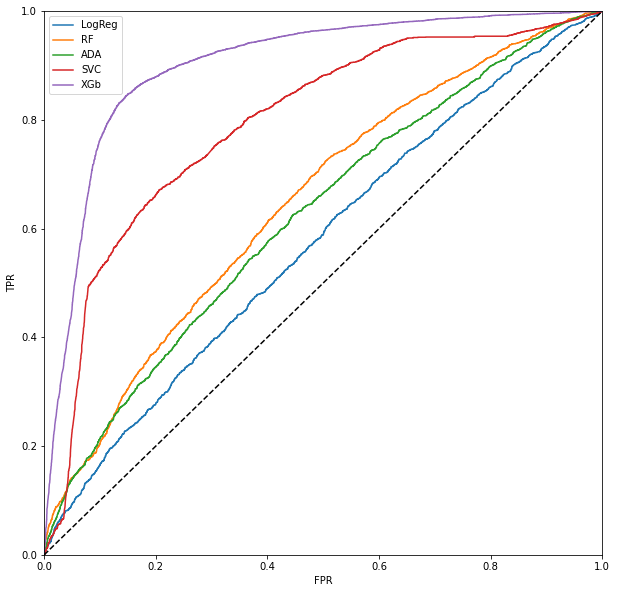

In [258]:
y_pred=[mod.predict(X_test) for mod in models]
scores=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['LogReg','RF','ADA','SVC','XGb']
for i,pred in enumerate(y_pred):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(data_final['Risk_Flag'].unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

#### Model XGb menghasilkan nilai ROC AUC yang paling baik dibandingkan dengan model LogReg, RF, ADA, SVC.

# Conclusion

## Data Analysis
### Berdasarkan feature selection menggunakan Random Forest, feature yang berpengaruh:
* #### Income: perbandingan pendapatan dan jumlah loan
* #### State: daerah yang stabil/tidak untuk kondisi ekonomi dan sosial-politiknya
* #### Profession: profesi apa saja yang lebih stabil

#### Fitur-fitur ini bisa dijadikan acuan untuk meningkatkan pemasaran dan bisa lebih fokus sehingga hasil bisa lebih optimal.


## Model Analysis
#### Model yang baik untuk dataset ini adalah XGB, dikarenakan dataset merupakan data classification dan jumlah data >100K